___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866" width="200px" height="180px" />


# <font color= #bbc28d> **Fashion MNIST** </font>
#### <font color= #2E9AFE> `Project 1 - Machine Learning`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez, Isabel Valladolid & Vivienne Toledo </Strong>
- <Strong> Fecha </Strong>: 21/09/2025.

___

<p style="text-align:right;"> Image retrieved from: https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866</p>

# <font color= #bbc28d> **Introduction** </font>
The goal of this project is to classify fashion items using the **Fashion-MNIST** image dataset, which contains **60,000 training** images and **10,000 test** images of 28×28 grayscale images representing 10 different categories (e.g., t-shirts, trousers, sneakers).

We will implement and evaluate various machine learning and deep learning algorithms to compare their performance in image classification:
- Logistic Regression 
- Support Vector Machine (SVM)
- Random Forest
- Neural Network (MLP) 
- Convolutional Neural Network (CNN) 

The project will involve loading and preprocessing the dataset, training each model, and evaluating their accuracy on the test set to understand how different algorithms perform on visual data classification tasks

# <font color= #bbc28d> **Data Preprocessing** </font>
Before modeling, we must preprocess the data to achieve better results and ensure it can be used by our models.

In [1]:
# Librerías Generales
import numpy as np
import time
from tensorflow.keras import datasets

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Pytorch CNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import datasets as torchdata

### <font color= #bbc28d>• **Data Loading** </font>
We load the Fashion-MNIST dataset and then split the original training set into a **training and development (validation)** set using an 80-20 split. The split keeps the class distribution consistent.
So in total we have:
- Train data - 48_000 [For training our models]
- Dev data - 12_000 [Tunning the params]
- Test data - 10_000 [One blind real test]

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"""Train Data: {X_train.shape} \n
Dev Data: {X_dev.shape} \n
Test Data: {X_test.shape}""")

Train Data: (48000, 28, 28) 

Dev Data: (12000, 28, 28) 

Test Data: (10000, 28, 28)


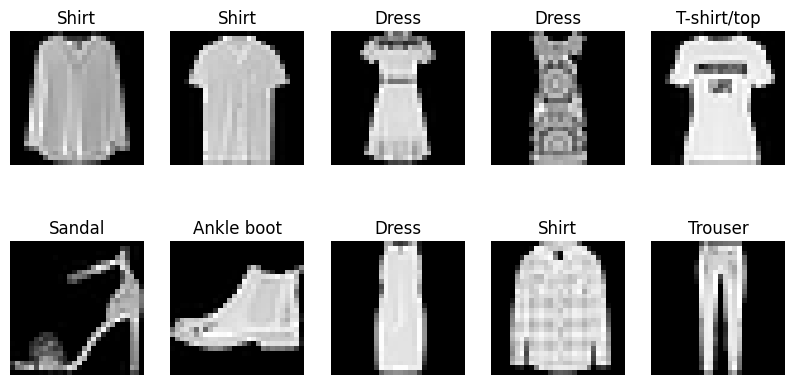

In [18]:
# Visualize the images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

### <font color= #bbc28d>• **Image Normalization** </font>
Pixel values range from 0 to 255. Scaling them to [0,1] improves model performance.

In [3]:
# Normalize and expand dims [for keras imagedatagenerator]
X_train_norm = np.expand_dims(X_train, -1).astype(np.float32) / 255.0

# Simple normalize and flatten
X_dev_flat  = (X_dev.astype(np.float32) / 255.0).reshape(len(X_dev), -1)
X_test_flat = (X_test.astype(np.float32) / 255.0).reshape(len(X_test), -1)

### <font color= #bbc28d>• **Noise Insertion** </font>
To improve generalization, we will use `ImageDataGenerator` from Keras to synthetically augment the training images. This includes transformations such as random zooms, horizontal flips, and other small variations. These augmentations are **applied only to the training set**, while the development and test sets remain unchanged, allowing us to evaluate the models on the original data and ensure they generalize well.

In [4]:
# Data generator to add noise / transformations
datagen = ImageDataGenerator(  
    rotation_range=10,                  # Image Rotation
    width_shift_range=0.1,              # Width Shift
    height_shift_range=0.1,             # Height Shift
    shear_range=0.05,                   # Axis Bias
    zoom_range=0.1,                     # Zoom
    horizontal_flip=True,               # Horizontal Split
)

# Generate augmented images 
data_gen_train = datagen.flow(X_train_norm, y_train, batch_size=32, seed=42)

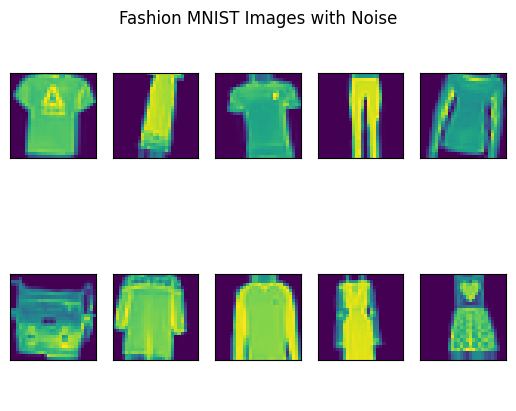

In [21]:
plt.title('Fashion MNIST Images with Noise')
plt.axis("off")
for imagen, etiqueta in data_gen_train:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

The variable _data-gen-train_ contains the images with noise added, in adequate dimensions for a Keras Convolutional Neural Network (CNN). 

### <font color= #bbc28d>• **Image Vectorization** </font>
Some of the models used in this notebook only accept vectorized input variables. Thus, we have to vectorize _data-gen-train_.

In [5]:
X_train_aug = []
y_train_aug = []

for i in range(len(data_gen_train)):
    X_batch, y_batch = data_gen_train[i]
    X_train_aug.append(X_batch)
    y_train_aug.append(y_batch)

X_train_aug = np.concatenate(X_train_aug)
y_train_aug = np.concatenate(y_train_aug)

# Flatten for Random Forest
X_train_flat = X_train_aug.reshape(len(X_train_aug), -1)

In the end, after all the data pre-processing we have the next datasets:
- **Train** - X_train_flat, y_train_aug
- **Dev** - X_dev_flat, y_dev
- **Test** - X_test_flat, y_test

All ready to be passed into sci-kit learn models.

# <font color= #bbc28d> **Logistic Regression** </font>

In [ ]:
def eval(y_true, y_pred):
    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Mostrar resultados
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xticks(rotation = 75)
    plt.show()

# <font color= #bbc28d> **Support Vector Classifier** </font>

In [34]:
svc = SVC(kernel='rbf', gamma='scale', C=5, random_state=69)

svc.fit(X_train_flat, y_train_aug)

SVC(C=5, random_state=69)

Accuracy: 0.8440
Precision: 0.8464
Recall: 0.8440
F1 Score: 0.8444


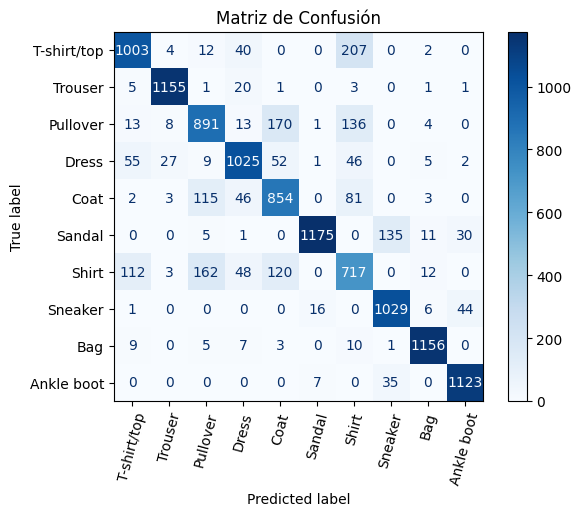

In [35]:
y_pred2 = svc.predict(X_dev_flat)

eval(y_pred2, y_dev)

# <font color= #bbc28d> **Random Forest Classifier** </font>

To identify the best parameters while efficiently balancing performance and execution costs, we first visualized the behavior of a base model across different parameter values. After narrowing down the options, we finalized the following grid:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Using the graphs as inspo, make a grid that could give the best results without overfitting
param_grid = {        
    'max_depth': [10, 11, 12, 13],           # based on your earlier search
    'min_samples_leaf': [2, 3, 5, 6],           # regularization for leaves
    'min_samples_split': [6, 8, 10, 12],      # regularization for splits
    'ccp_alpha' : [0.001, 0.0001, 0.00001]      # regularization param
}

# Make the object base model
rf = RandomForestClassifier(
    n_estimators = 100,
    bootstrap=False,
    n_jobs=-1,
    random_state=2
)

# Use grid_search to find the best params
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=3,
    verbose=2,
    n_jobs=-1
)

# To make the process faster, we will use a small portion
slice_size = 10000  
X_train_slice = X_train_flat[:slice_size]
y_train_slice = y_train_aug[:slice_size]

# Fit the grid
grid_search.fit(X_train_slice, y_train_slice)

# Print the results to use in the train data
print("Best params from train set:", grid_search.best_params_)
print("Best CV f1_score on train:", grid_search.best_score_)

Now, we will use those parameters to create our final model:

In [8]:
# Use the params obtained in CV
clf =  RandomForestClassifier(
    n_estimators=100,
    max_depth=13,
    min_samples_leaf=2,
    min_samples_split=12,
    bootstrap=False,
    n_jobs=-1,
    ccp_alpha = 0.00001,
    random_state=2
)

# Train the model
clf.fit(X_train_flat, y_train_aug)

# Metrics on the dev/train
dev_acc = clf.score(X_dev_flat, y_dev)
train_acc = clf.score(X_train_flat, y_train_aug)
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Dev Accuracy: {dev_acc:.3f}")

Train Accuracy: 0.868
Dev Accuracy: 0.787


Finally, after re-adjusting and tunning the hyper-parameters of the model, let's make predictions and take out the perfomance metrics:

Accuracy: 0.776
Precision: 0.771
Recall: 0.776
F1 Score: 0.768


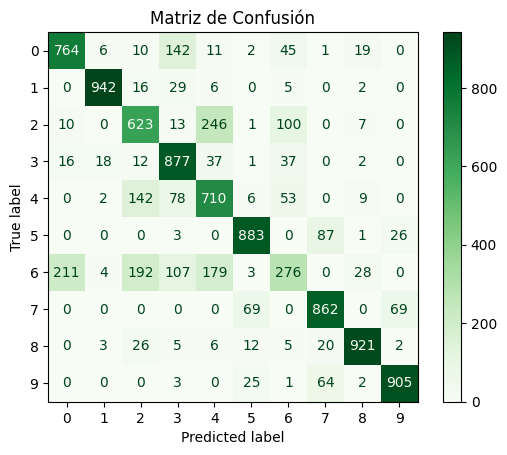

In [9]:
# Make predictions on test
y_pred = clf.predict(X_test_flat)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Show metrics performance
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# CM
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión')
plt.show()

# <font color= #bbc28d> **Multilayered Perceptron** </font>

# <font color= #bbc28d> **Convolutional Neural Network** </font>

In [2]:
# Checking GPU access
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "dont")
print(device)

True
cuda


In [3]:
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)

In [4]:
# Transformation pipeline to turn images into tensors, and normalizing said images (DIFERENTE A LA QUE VAMOS A USAR PARA LAS PRUEBAS!!!!!!!!!!!!!!!)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])

In [5]:
# Loading the data

train_data = torchdata.FashionMNIST(root='./Data', train=True, download=True, transform=transform)
test_data = torchdata.FashionMNIST(root='./Data', train=False, download=True, transform=transform)

BATCH_SIZE = 64

trainloader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle=True)

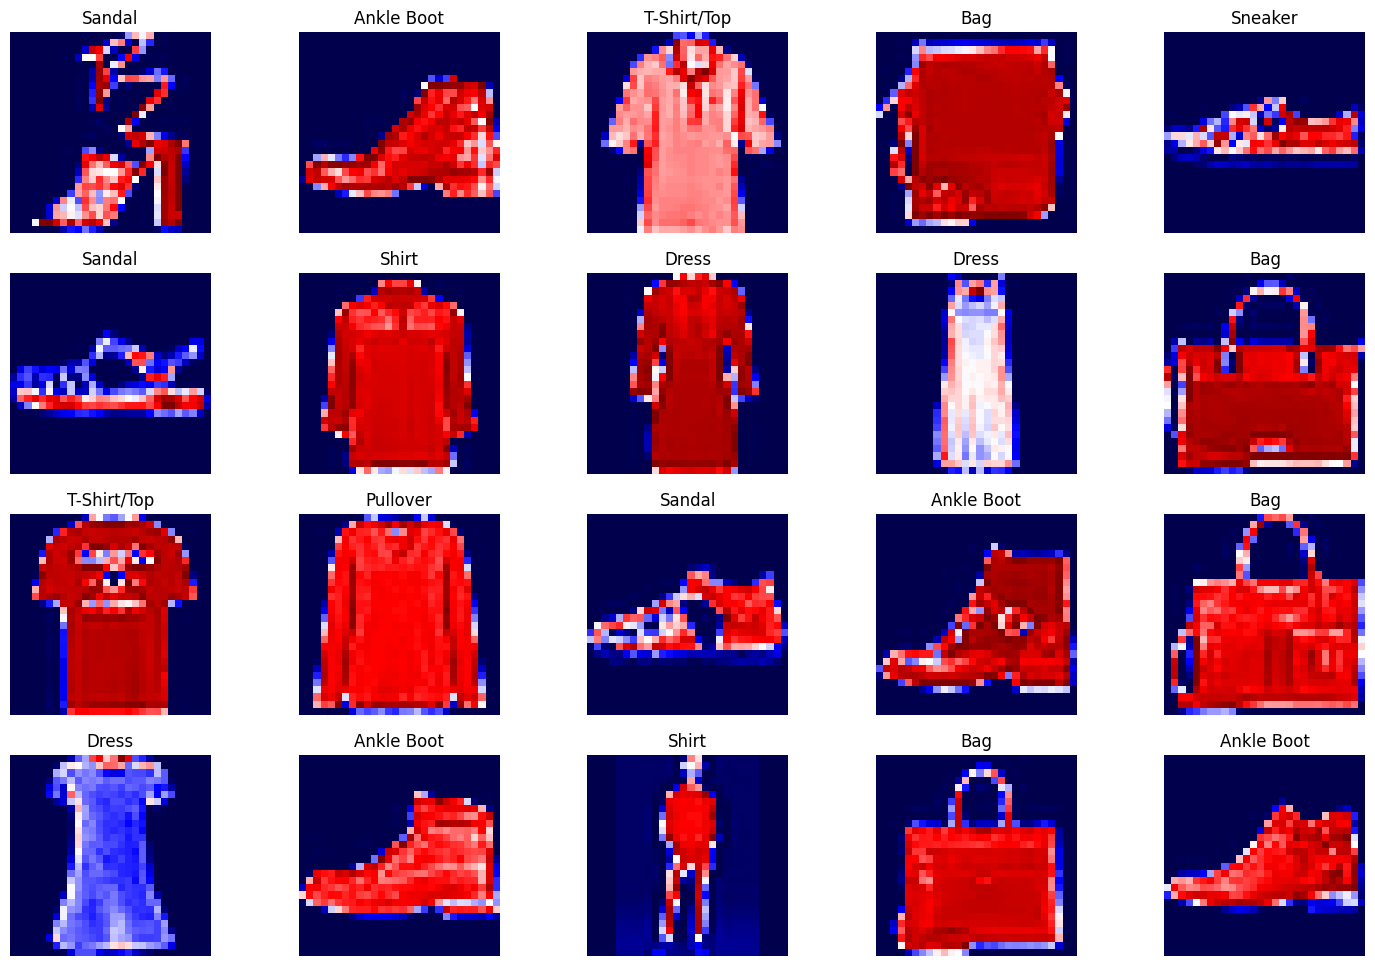

In [6]:
# Pre-Viz of the images
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

images, labels = next(iter(trainloader))

preview = plt.figure(figsize=(18,12))
for i in range(20):
    ax = preview.add_subplot(4, 5, i+1)
    ax.imshow(np.squeeze(images[i].numpy()), cmap='seismic')
    ax.set_title(class_names[labels[i].item()])
    ax.axis('off')
plt.show()

In [7]:
# Defining the model architecture

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size= 3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
# Training model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists for visualization later
train_loss = []

# Training loop

EPOCHS = 7 # Doing trial and error testing, 7 appears to be the sweet spot in the number of epochs to avoid overfitting the model
for epoch in range(EPOCHS):
    start_time = time.time()
    model.train()
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    training_loss = running_loss/len(trainloader)
    train_loss.append(training_loss)
    
    print(f'Epoch: {epoch + 1}. Loss {training_loss:.2f}. Time Taken: {(time.time() - start_time):.2f}')

Epoch: 1. Loss 0.54. Time Taken: 13.51
Epoch: 2. Loss 0.36. Time Taken: 12.44
Epoch: 3. Loss 0.31. Time Taken: 12.37
Epoch: 4. Loss 0.28. Time Taken: 12.40
Epoch: 5. Loss 0.25. Time Taken: 12.52
Epoch: 6. Loss 0.24. Time Taken: 12.61
Epoch: 7. Loss 0.22. Time Taken: 12.78


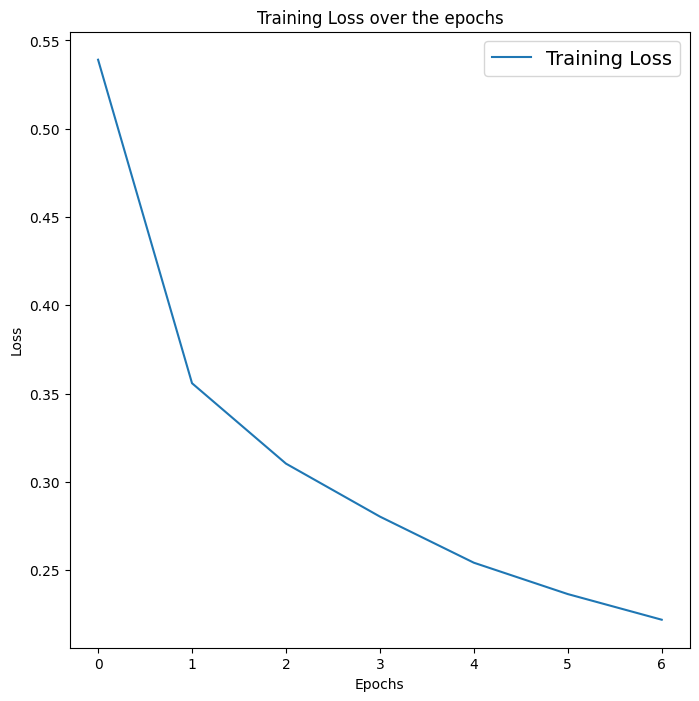

In [9]:
# Training loss over time

plt.figure(figsize=(8,8))
plt.title("Training Loss over the epochs")
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize=14)

In [10]:
# Model evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * (correct / total)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 91.0900
